In [1]:
!nvidia-smi

Wed Mar 22 07:16:11 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.73.05    Driver Version: 510.73.05    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro M4000        Off  | 00000000:00:05.0 Off |                  N/A |
| 46%   28C    P8    11W / 120W |      0MiB /  8192MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install diffusers==0.11.1
!pip install transformers scipy ftfy accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.8/212.8 kB 30.0 MB/s eta 0:00:00


In [3]:
import torch

from diffusers import StableDiffusionPipeline

In [4]:
model_id = "gsdf/Counterfeit-V2.5"

In [21]:
prompt = "((masterpiece, best quality)), detailed, pink eyes, long hair, black hair, (grapefruit in front), (temple in the background), sitting, red kimono, light smile, arms behind back, water, sunset, hair ornament, "
negative_prompt = "((((ugly)))), (((duplicate))), ((morbid)), ((mutilated)), out of frame, extra fingers, mutated hands, ((poorly drawn hands)), ((poorly drawn face)), (((mutation))), (((deformed))), ((ugly)), blurry, ((bad anatomy)), (((bad proportions))), ((extra limbs)), cloned face, (((disfigured))), out of frame, ugly, extra limbs, (bad anatomy), gross proportions, (malformed limbs), ((missing arms)), ((missing legs)), (((extra arms))), (((extra legs))), mutated hands, (fused fingers), (too many fingers), (((long neck)))"

In [6]:
num_inference_steps = 20 
guidance_scale = 7

In [7]:
image_height = 864
image_width = 512

In [8]:
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

pipe.enable_attention_slicing()
pipe.safety_checker = None

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

In [22]:
seeds = []

def get_inputs(batch_size=1, manual_seed=None):   
  generator = torch.Generator("cuda")
  for i in range(batch_size):
    seed = generator.seed() if manual_seed == None else manual_seed
    seeds.append(seed)
    generator = generator.manual_seed(seed)
  prompts = batch_size * [prompt] 
  negative_prompts = batch_size * [negative_prompt]

  return {"prompt": prompts, "negative_prompt": negative_prompts ,"generator": generator, "guidance_scale": guidance_scale, "num_inference_steps": num_inference_steps, "height": image_height, "width": image_width}                                                                                                                                              

In [23]:
from PIL import Image                                                                                                                                                                                                                         

def image_grid(imgs, rows=1, cols=1):                                                                                                                                                                                                         
    w = image_width
    h = image_height                                                                                                                                                                                                                      
    grid = Image.new('RGB', size=(cols*w, rows*h))                                                                                                                                                                                            
                                                                                                                                                                                                                                              
    for i, img in enumerate(imgs):                                                                                                                                                                                                            
        grid.paste(img, box=(i%cols*w, i//cols*h))    
                                                                                                                                                                                                
    return grid     

  0%|          | 0/20 [00:00<?, ?it/s]

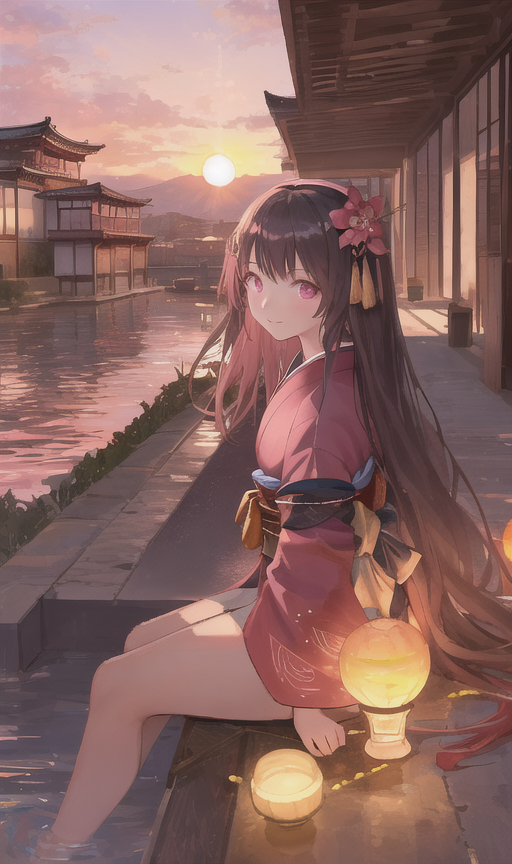

In [24]:
seeds.clear()

images = pipe(**get_inputs(batch_size=1)).images                                                                                                                                                                                              
image_grid(images, rows=1, cols=1)                

Seed = 4761641549416184


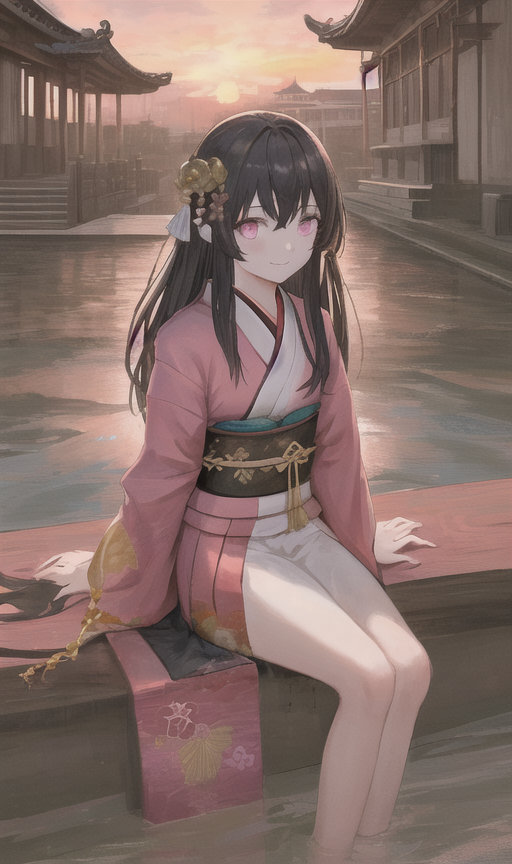

In [12]:
image_index = 0

seed = seeds[image_index]
print("Seed =", seed)
images[image_index]